In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import unidecode
%matplotlib inline

In [96]:
from pattern.en import sentiment, polarity, subjectivity
def sentiment(text):
    return polarity(text)

def subj(text):
    return subjectivity(text)

In [97]:
hilary = pd.read_csv('old_notebooks/hilary_comments2.csv')
hilary['Sentiment'] = hilary.apply(lambda row: sentiment(row['Comment']), axis = 1)
hilary['Subjectivity'] = hilary.apply(lambda row: subj(row['Comment']), axis = 1)
hilary['Sentiment2'] = hilary['Comment'] 

In [101]:
def sentiment_new(text):
    def remove_html_tags(data):
        p = re.compile(r'<[^<]*?>')
        return p.sub('', data)

    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList

    content = remove_html_tags(text)
    content = unidecode.unidecode(content).replace("\n"," ").replace("\'", " ")
    s_max = 0
    comment_score = 0

    for i in Sentences(content):
        if abs(sentiment(i)) > abs(s_max):
            comment_score = sentiment(i)
            s_max = sentiment(i)
    return comment_score

In [118]:
def subj_new(text):
    def remove_html_tags(data):
        p = re.compile(r'<[^<]*?>')
        return p.sub('', data)

    def Sentences(paragraph):
        sentenceEnders = re.compile('[.!?]')
        sentenceList = sentenceEnders.split(paragraph)
        return sentenceList

    content = remove_html_tags(text)
    content = unidecode.unidecode(content).replace("\n"," ").replace("\'", " ")
    s_max = 0
    comment_score = 0

    for i in Sentences(content):
        if abs(subj(i)) > abs(s_max):
            comment_score = subj(i)
            s_max = subj(i)
    return comment_score

In [102]:
hilary['Sentiment2'] = hilary['Comment'].apply(lambda row: sentiment_new(row))


/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [119]:
hilary['Subj2'] = hilary['Comment'].apply(lambda row: subj_new(row))

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


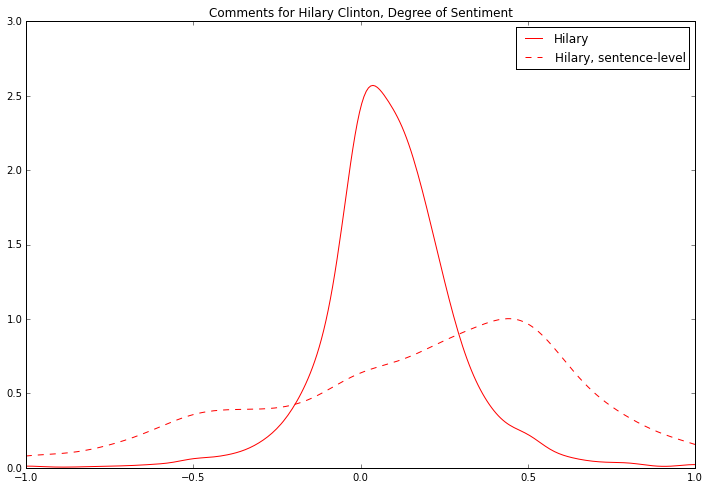

In [124]:
from scipy.stats import gaussian_kde
plt.figure(figsize=(12,8))

data = hilary['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'r', label = 'Hilary')

data = hilary['Sentiment2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'r--', label = 'Hilary, sentence-level')
plt.title("Comments for Hilary Clinton, Degree of Sentiment")
plt.legend()


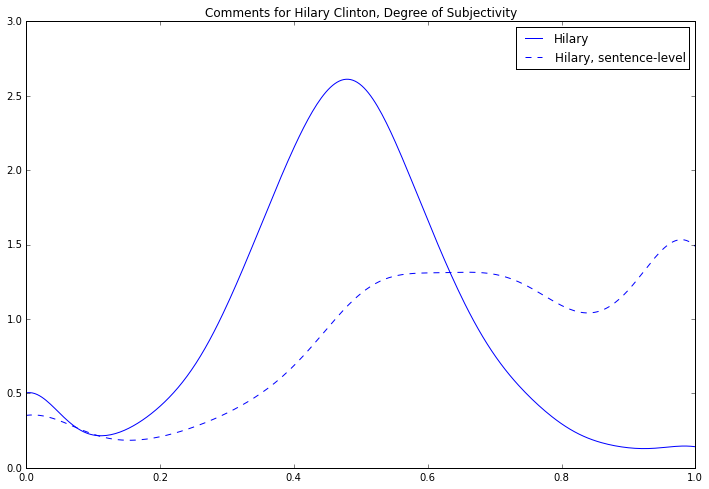

In [123]:
plt.figure(figsize=(12,8))

data = hilary['Subjectivity']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b', label = 'Hilary')

data = hilary['Subj2']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b--', label = 'Hilary, sentence-level')
plt.title("Comments for Hilary Clinton, Degree of Subjectivity")
plt.legend()



In [126]:
hilary_scores = hilary.to_csv('hilary_scores.csv')

In [111]:
trump = pd.read_csv('old_notebooks/trump_comments2.csv')
trump['Sentiment'] = trump.apply(lambda row: sentiment(row['Comment']), axis = 1)
trump['Subjectivity'] = trump.apply(lambda row: subj(row['Comment']), axis = 1)
trump['Sentiment2'] = trump['Comment'] 
trump['Sentiment2'] = trump['Comment'].apply(lambda row: sentiment_new(row))

In [127]:
trump['Subj2'] = trump['Comment'].apply(lambda row: subj_new(row))

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


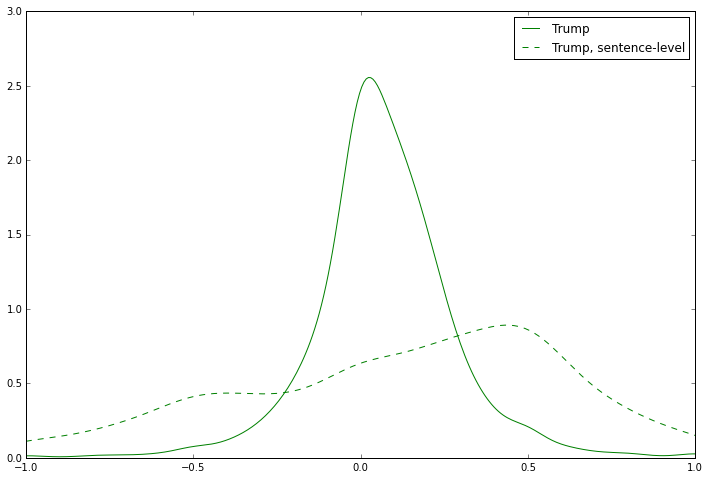

In [125]:
plt.figure(figsize=(12,8))

data = trump['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Trump')

data = trump['Sentiment2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g--', label = 'Trump, sentence-level')
plt.title("Comments for Hilary Clinton, Degree of Sentiment")
plt.legend()

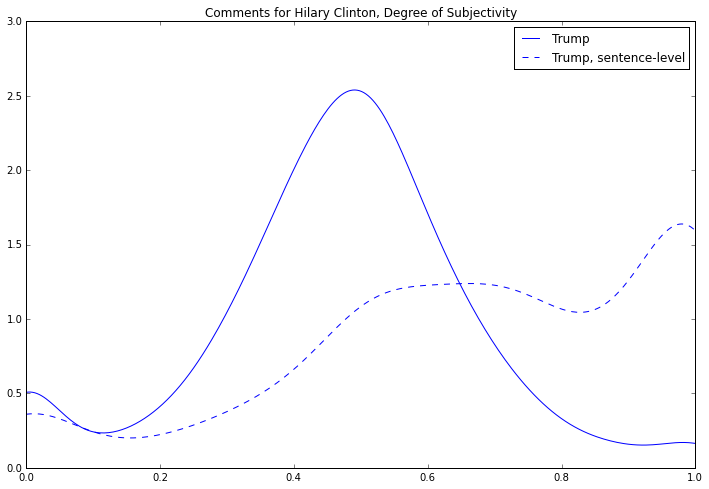

In [128]:
plt.figure(figsize=(12,8))

data = trump['Subjectivity']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b', label = 'Trump')

data = trump['Subj2']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b--', label = 'Trump, sentence-level')
plt.title("Comments for Hilary Clinton, Degree of Subjectivity")
plt.legend()


In [129]:
trump_scores = trump.to_csv('trump_scores.csv')

In [132]:
hilary.head()

,Unnamed: 0,Comment,URL,Sentiment,Subjectivity,Sentiment2,Subj2
0,0,What Republican wannabe POTUS candidate among ...,http://takingnote.blogs.nytimes.com/2015/09/03...,-0.066911,0.471123,-0.200,0.762963
1,1,"Tax Pledges, loyalty pledges but still no pled...",http://takingnote.blogs.nytimes.com/2015/09/03...,0.200000,0.300000,0.200,0.300000
2,2,"Correct me if I'm wrong, but I believe Republi...",http://takingnote.blogs.nytimes.com/2015/09/03...,-0.025000,0.383333,-0.025,0.383333
3,3,Trump isn't running for President he is runnin...,http://takingnote.blogs.nytimes.com/2015/09/03...,0.300000,0.200000,0.300,0.200000
4,4,The GOP now owns Trump and all his narrow-mind...,http://takingnote.blogs.nytimes.com/2015/09/03...,0.000000,0.000000,0.000,0.000000


In [133]:
trump.head()

,Unnamed: 0,Comment,URL,Sentiment,Subjectivity,Sentiment2,Subj2
0,0,"So this is the latest bit of ""news"" on Trump. ...",http://www.nytimes.com/2015/09/09/us/politics/...,0.180000,0.360000,0.500000,0.900000
1,1,"Ross writes: "" ... Elites can have wisdom that...",http://www.nytimes.com/2015/08/30/opinion/sund...,0.244762,0.480476,0.433333,0.690476
2,2,Look at this and every photo and television im...,http://www.nytimes.com/2015/08/23/us/politics/...,-0.250000,0.500000,-0.250000,0.500000
3,3,Strange....I don't remember the Times harping ...,http://www.nytimes.com/2015/09/09/us/politics/...,0.000000,0.000000,-0.050000,0.150000
4,4,This analysis seems to speak more to the weakn...,http://www.nytimes.com/2015/09/15/upshot/the-c...,0.291667,0.458333,0.500000,0.500000


In [116]:
biden = pd.read_csv('old_notebooks/biden_comments2.csv')
biden['Sentiment'] = biden.apply(lambda row: sentiment(row['Comment']), axis = 1)
biden['Subjectivity'] = biden.apply(lambda row: subj(row['Comment']), axis = 1)
biden['Sentiment2'] = biden['Comment'] 
biden['Sentiment2'] = biden['Comment'].apply(lambda row: sentiment_new(row))

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [135]:
biden['Subj2'] = biden['Comment'].apply(lambda row: subj_new(row))

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


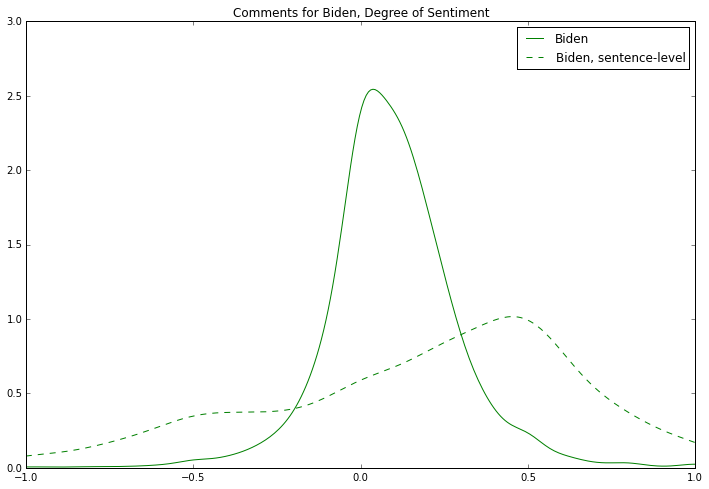

In [139]:
plt.figure(figsize=(12,8))

data = biden['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Biden')

data = biden['Sentiment2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g--', label = 'Biden, sentence-level')
plt.title("Comments for Biden, Degree of Sentiment")
plt.legend()


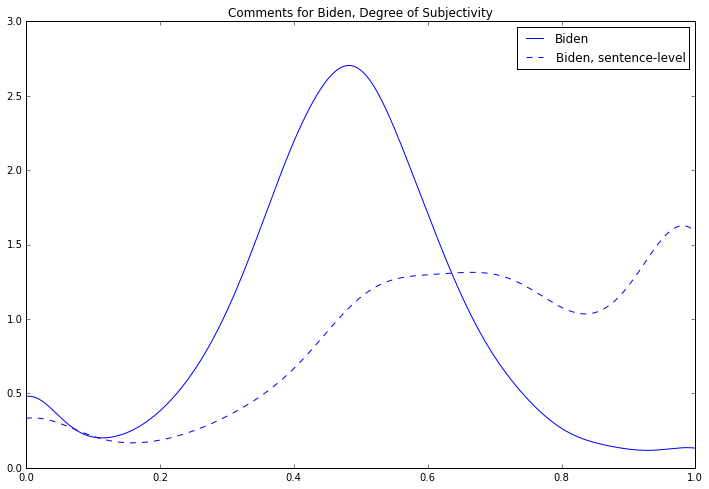

In [140]:
plt.figure(figsize=(12,8))

data = biden['Subjectivity']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b', label = 'Biden')

data = biden['Subj2']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'b--', label = 'Biden, sentence-level')
plt.title("Comments for Biden, Degree of Subjectivity")
plt.legend()


In [141]:
biden_scores = biden.to_csv('biden_scores.csv')

In [134]:
biden.head()

,Unnamed: 0,Comment,URL,Sentiment,Subjectivity,Sentiment2
0,0,I remember vividly the evening I was listening...,http://www.nytimes.com/2014/09/21/opinion/sund...,0.263695,0.555556,0.500000
1,1,"'IN case you missed it, our nation’s officehol...",http://www.nytimes.com/2014/09/21/opinion/sund...,-0.064583,0.520833,-0.750000
2,2,Reminds me of the book Presidential Power by R...,http://www.nytimes.com/2014/09/21/opinion/sund...,0.471429,0.433333,0.866667
3,3,Will President Obama grant a pardon to Hillary...,http://www.nytimes.com/2015/08/14/us/politics/...,0.333333,0.833333,0.333333
4,4,"Yeah, I tell you, that Obama is just a do noth...",http://www.nytimes.com/2014/08/27/opinion/maur...,-0.053202,0.564107,-0.312500


In [155]:
sanders = pd.read_csv('old_notebooks/sanders_comments2.csv')
sanders['Sentiment'] = sanders.apply(lambda row: sentiment(row['Comment']), axis = 1)
sanders['Subjectivity'] = sanders.apply(lambda row: subj(row['Comment']), axis = 1)
sanders['Sentiment2'] = sanders['Comment'] 
sanders[pd.isnull(sanders['Comment'])] = ""


In [146]:
sanders['Sentiment2'] = sanders['Comment'].apply(lambda row: sentiment_new(row))
sanders['Subj2'] = sanders['Comment'].apply(lambda row: subj_new(row))

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


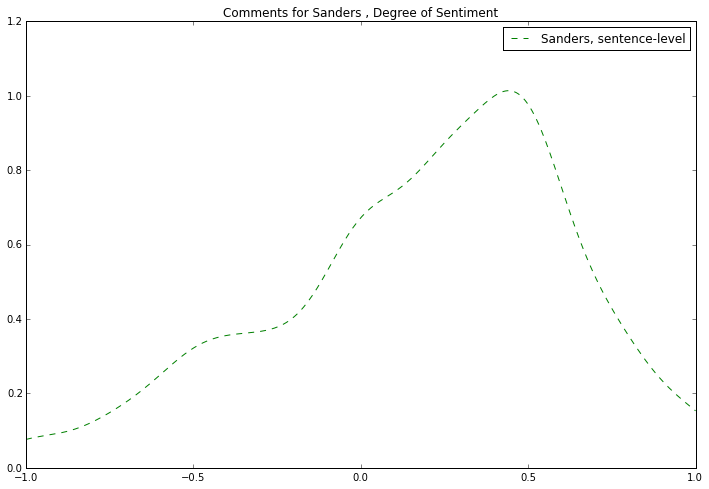

In [151]:
plt.figure(figsize=(12,8))

# data = sanders['Sentiment']
# density = gaussian_kde(data)
# xs = np.linspace(-1,1,300)
# density.covariance_factor = lambda : .25
# density._compute_covariance()
# plt.plot(xs,density(xs), 'g', label = 'Sanders')

data = sanders['Sentiment2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g--', label = 'Sanders, sentence-level')
plt.title("Comments for Sanders , Degree of Sentiment")
plt.legend()

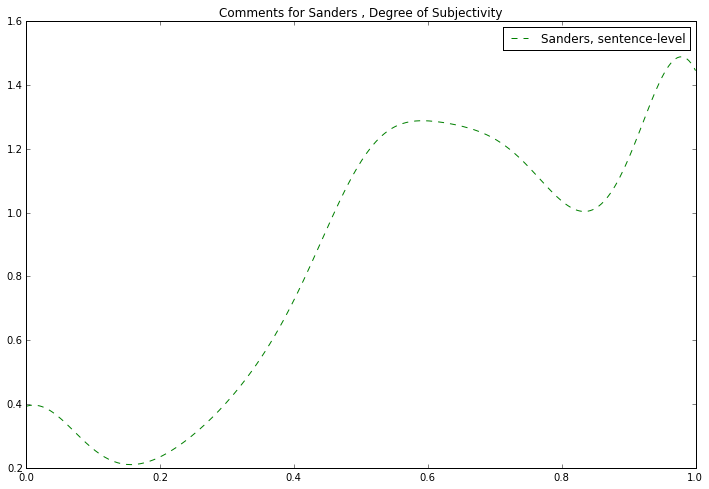

In [153]:
plt.figure(figsize=(12,8))

# data = sanders['Subjectivity']
# density = gaussian_kde(data)
# xs = np.linspace(0,1,300)
# density.covariance_factor = lambda : .25
# density._compute_covariance()
# plt.plot(xs,density(xs), 'g', label = 'Sanders')

data = sanders['Subj2']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g--', label = 'Sanders, sentence-level')
plt.title("Comments for Sanders , Degree of Subjectivity")
plt.legend()

In [154]:
sanders_scores = sanders.to_csv('sanders_scores.csv')

In [156]:
bush = pd.read_csv('old_notebooks/bush_comments2.csv')
bush['Sentiment'] = bush.apply(lambda row: sentiment(row['Comment']), axis = 1)
bush['Subjectivity'] = bush.apply(lambda row: subj(row['Comment']), axis = 1)
bush['Sentiment2'] = bush['Comment'] 
bush[pd.isnull(bush['Comment'])] = ""


In [157]:
bush['Sentiment2'] = bush['Comment'].apply(lambda row: sentiment_new(row))
bush['Subj2'] = bush['Comment'].apply(lambda row: subj_new(row))

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


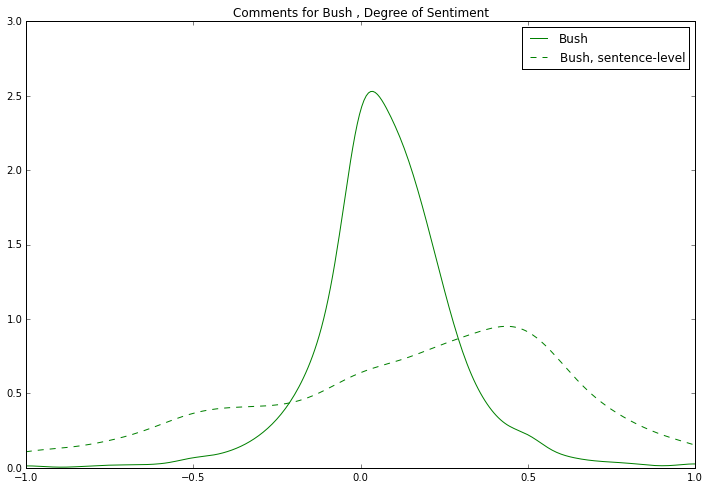

In [158]:
plt.figure(figsize=(12,8))

data = bush['Sentiment']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Bush')

data = bush['Sentiment2']
density = gaussian_kde(data)
xs = np.linspace(-1,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g--', label = 'Bush, sentence-level')
plt.title("Comments for Bush , Degree of Sentiment")
plt.legend()

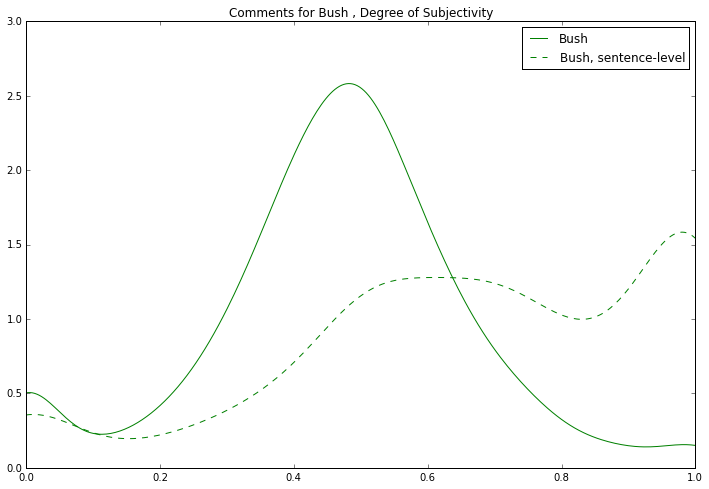

In [166]:
plt.figure(figsize=(12,8))

data = bush['Subjectivity']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g', label = 'Bush')

data = bush['Subj2']
density = gaussian_kde(data)
xs = np.linspace(0,1,300)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), 'g--', label = 'Bush, sentence-level')
plt.title("Comments for Bush , Degree of Subjectivity")
plt.legend()

In [161]:
bush_scores = bush.to_csv('bush_scores.csv')

In [164]:
carson = pd.read_csv('old_notebooks/carson_comments2.csv')
carson['Sentiment'] = carson.apply(lambda row: sentiment(row['Comment']), axis = 1)
carson['Subjectivity'] = carson.apply(lambda row: subj(row['Comment']), axis = 1)
carson['Sentiment2'] = carson['Comment'] 


In [167]:
carson[pd.isnull(carson['Comment'])] = ""
carson['Sentiment2'] = carson['Comment'].apply(lambda row: sentiment_new(row))
carson['Subj2'] = carson['Comment'].apply(lambda row: subj_new(row))

/Users/datascientist/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: RuntimeWarning: Argument <type 'str'> is not an unicode object. Passing an encoded string will likely have unexpected results.


In [171]:
carson.head()

,Unnamed: 0,Comment,URL,Sentiment,Subjectivity,Sentiment2,Subj2
0,0,"Other than that he is of age, what specific, e...",http://www.nytimes.com/2015/03/22/magazine/how...,-0.00625,0.25,-0.00625,0.250000
1,1,"While I think he means well, in tone, Mr. Wehn...",http://www.nytimes.com/2015/01/15/opinion/cons...,0.1045455,0.444697,0.25000,0.625000
2,2,This column would be hysterically funny if it ...,http://www.nytimes.com/2015/09/10/opinion/gail...,0.25,1,0.25000,1.000000
3,3,"There's a psychological quirk, I don't know if...",http://www.nytimes.com/2015/04/16/opinion/char...,0.114881,0.3830357,0.35000,0.491667
4,4,Will someone ask this pediatric neurosurgeon w...,http://www.nytimes.com/2015/03/22/magazine/how...,0.1071429,0.4320106,0.50000,0.575000


In [180]:
carson1 = pd.read_csv('carson1.csv')
bush1 = pd.read_csv('bush1.csv')
trump1 = pd.read_csv('trump1.csv')

### PARSING LOCATION!

In [11]:
sanders = pd.read_csv('data/sanders_meta.csv')

In [12]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}


0                  Sacramento, CA
1                Centerville Iowa
2                              US
3                    Planet Earth
4                        Portland
5                        Oklahoma
6                      Park Slope
7                          Boston
8                       

In [13]:
def get_state(x):
    x_val = x.lower().title()
    if x_val in states.values():
        return states.keys()[states.values().index(x_val)]
    elif x in states.keys():
        return x
    else:
        return None

def state(loc):
    if get_state(loc) != None:
        return get_state(loc)
    else: 
        tokens = loc.upper().split(', ')
        if len(tokens) == 1:
            return get_state(tokens[0])
        else:
            return get_state(tokens[1])

def city(loc):
    tokens = loc.lower().title().split(', ')
    print tokens
    
    for obj in tokens:
        if obj in states.values():
            return None
        elif obj  == 'Usa' or tokens == 'Us':
            return None
        else: 
            return tokens[0]

    

In [243]:
print state('Hokoben, NJ') #
print state('NEW JERSEY') 

NJ
NJ


In [254]:
print city('Oak Park, NJ')
print city('Oak Park')
print city('OAK PARK')

['Oak Park', 'Nj']
Oak Park
['Oak Park']
Oak Park
['Oak Park']
Oak Park


In [14]:
sanders['State'] = sanders.apply(lambda row: state(str(row['Locations'])), axis = 1)
sanders['City'] = sanders.apply(lambda row: city(str(row['Locations'])), axis = 1)

['Sacramento', 'Ca']
['Centerville Iowa']
['Us']
['Planet Earth']
['Portland']
['Oklahoma']
['Park Slope']
['Boston']
['Usa']
['Portland']
['Ohio']
['Idaho']
['Michigan']
['Columbus']
['Belgium']
['Maine']
['Nh']
['Charleston', 'Sc']
['Western Nc']
['Madison']
['Hartford', 'Ct']
['Virginia']
['Toronto']
['Kissimmee', 'Florida']
['Nj']
['Wilkes Barre Pa']
['San Rafael']
['Brooklyn Ny']
['Pa']
['Oak Park', 'Il']
['Us']
['Pa']
['Cleveland', 'Oh']
['Maine']
['Paterson', 'New Jersey', 'Usa']
['Los Angeles', 'Ca']
['Us']
['Portland']
['Cant Get There From Here']
['New York City']
['Kissimmee', 'Florida']
['Cant Get There From Here']
['New York City']
['Kissimmee', 'Florida']
['San Diego', 'Ca']
['Saint Louis']
['Portland']
['Wilkes Barre Pa']
['Virginia']
['Us']
['Cant Get There From Here']
['New York City']
['Kissimmee', 'Florida']
['Virginia']
['Cant Get There From Here']
['New York', 'Ny']
['Portland']
['New York City']
['New York']
['Chicago']
['Longmont', 'Colorado']
['New York City']
[

In [260]:
#percent of State misisng
pd.isnull(sanders['City']).sum()/float(len(sanders))

0.19939854648734442

In [15]:
df = sanders[sanders['State'].apply(lambda x: x is not None)]

In [17]:
longlat = pd.read_csv('data/longlat.csv', error_bad_lines=False)

In [20]:
result = pd.merge(df, longlat, on=['State'])


In [21]:
result.to_csv('sanders_test.csv')